In [ ]:
import pandas as pd
import numpy as np
import torch
import sys
from torch.utils.data import random_split
import matplotlib.pyplot as plt

In [164]:
csvs_pth="../ode_dataset/2nd_dataset/"
csv_number_list=np.linspace(0,255,256).astype(int)
data_list = []
label_list= []
data_tensors=torch.zeros(1,100,9)

In [165]:
def read_csv_and_save(path:str):
    '''
    params path:     csv's path 
                     data in first 9 cols
               
    return data,label
    '''
    data=pd.read_csv(path,usecols=range(9))

    return data

    

torch.Size([1, 100, 9])
torch.Size([2, 100, 9])
torch.Size([3, 100, 9])
torch.Size([4, 100, 9])
torch.Size([5, 100, 9])
torch.Size([6, 100, 9])
torch.Size([7, 100, 9])
torch.Size([8, 100, 9])
torch.Size([9, 100, 9])
torch.Size([10, 100, 9])
torch.Size([11, 100, 9])
torch.Size([12, 100, 9])
torch.Size([13, 100, 9])
torch.Size([14, 100, 9])
torch.Size([15, 100, 9])
torch.Size([16, 100, 9])
torch.Size([17, 100, 9])
torch.Size([18, 100, 9])
torch.Size([19, 100, 9])
torch.Size([20, 100, 9])
torch.Size([21, 100, 9])
torch.Size([22, 100, 9])
torch.Size([23, 100, 9])
torch.Size([24, 100, 9])
torch.Size([25, 100, 9])
torch.Size([26, 100, 9])
torch.Size([27, 100, 9])
torch.Size([28, 100, 9])
torch.Size([29, 100, 9])
torch.Size([30, 100, 9])
torch.Size([31, 100, 9])
torch.Size([32, 100, 9])
torch.Size([33, 100, 9])
torch.Size([34, 100, 9])
torch.Size([35, 100, 9])
torch.Size([36, 100, 9])
torch.Size([37, 100, 9])
torch.Size([38, 100, 9])
torch.Size([39, 100, 9])
torch.Size([40, 100, 9])
torch.Siz

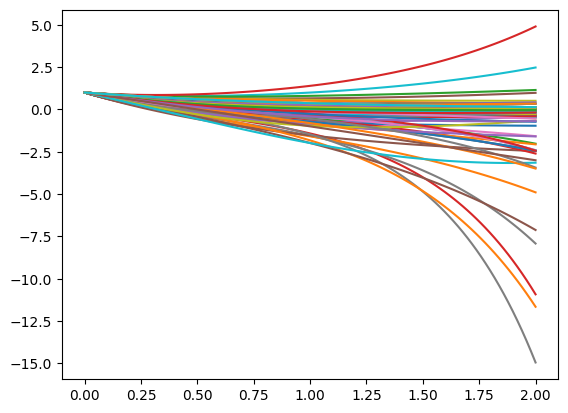

In [166]:
for i in csv_number_list:
    df=read_csv_and_save(csvs_pth+"data"+str(i)+".csv")
    # data save
    data_list.append(df.values)
    data_tensor=torch.tensor(data_list)
    print(data_tensor.shape)

    data_tensor=data_tensor[i,:,:].reshape(1,100,9)
    data_tensors=torch.cat((data_tensors,data_tensor),dim=0)
    #label save -we use the name as label
    label_list.append(i)
    label_tensor=torch.tensor(label_list)
print(label_tensor.shape)

    
data_tensors=data_tensors[1:,:,:]




In [167]:
data_tensors.shape


torch.Size([256, 100, 9])

In [168]:
torch.save({"data":data_tensors,
            "label_csv":label_tensor},
            '2ndtest.pt')


In [169]:
#read .pt

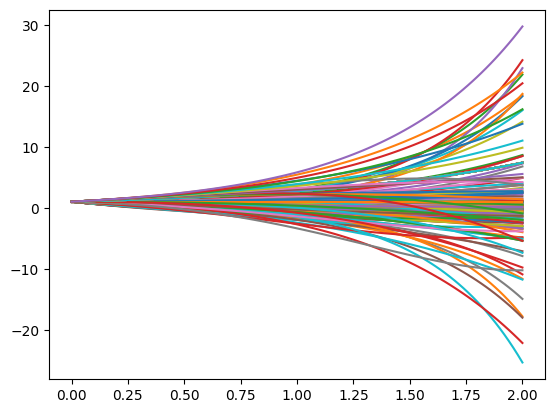

In [170]:
train_data=torch.load('2ndtest.pt')

train_data["data"].shape
for i in range(255):
    t=train_data["data"][i,:,6]
    z1_t=train_data["data"][i,:,7]
    plt.plot(t,z1_t)
plt.show()

In [171]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class CustomDataset(Dataset):
    def __init__(self, file_path):
        # 读取.pt文件
        data = torch.load(file_path)
        self.data = data['data']
        self.label = data['label_csv']
        self.length = len(self.data)
    
    def __getitem__(self, index):
        # 获取数据和标签
        data = self.data[index]
        label = self.label[index]
        
        # 数据预处理操作
        
        return data, label
    
    def __len__(self):
        return self.length


In [172]:
# 创建自定义的Dataset对象
dataset = CustomDataset('2ndtest.pt')

print(len(dataset))
# split dataset
train_size= int(len(dataset)*0.8)

test_size=len(dataset)-train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=True)

256


In [175]:
torch.save(train_dataloader,"2ndtrain.pth")
torch.save(test_dataloader,"2ndtest.pth")

In [ ]:
print("1")